# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [35]:
df.shape #this code shows us the shape of the dataset there are 1898 rows and 9 columns

(1898, 10)

#### Observations: 


There are 1898 rows and 9 columns

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [34]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
 9   total_time             1898 non-null   int64   
dtypes: category(3), float64(1), int64(5), object(1)
memory usage: 117.6+ KB


#### Observations: 


This shows us what columns are what variables and the data type of that variable. There is 1 float, 4 int, and 4 object variables

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [33]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

# use info() to print a concise summary of the DataFrame
df.info()
for col in ['restaurant_name', 'cuisine_type', 'day_of_the_week']:
    df[col]=df[col].astype('category') #this code changed the type from object to catergory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   total_time             1898 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 148.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -

#### Observations: 

This shows that we succesfully changed the data types for restuarant name, cuisine type, and day of the week


### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [32]:
df.describe() #this code shows us the summary statistics of this dataset

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,68.000000


#### Observations: 

The important features to look at here are the cost of the order in which the mean cost of an order is $16 the mean amount of food preparation time is 27 minutes, and the mean delivery time is 24 minutes


In [31]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df) #this code shows the missing values in the dataset we can see that there are none

,Total,Percent
order_id,0,0.0
customer_id,0,0.0
restaurant_name,0,0.0
cuisine_type,0,0.0
cost_of_the_order,0,0.0
day_of_the_week,0,0.0
rating,0,0.0
food_preparation_time,0,0.0
delivery_time,0,0.0
total_time,0,0.0


There are no missing variables

### **Question 5:** How many orders are not rated? (0.5 mark)

In [30]:
df['rating'].value_counts() #this code gives us the counts of all the observations in the rating column

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: 


There are 736 orders that were not rated, 588 5 star ratings 386 4 star ratings and 188 3 star ratings, this is alot of unrated orders which is not helpful when exploring the data. Foodhub should maybe offer some sort of incentive so that customers leave ratings.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

In [26]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="blue"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

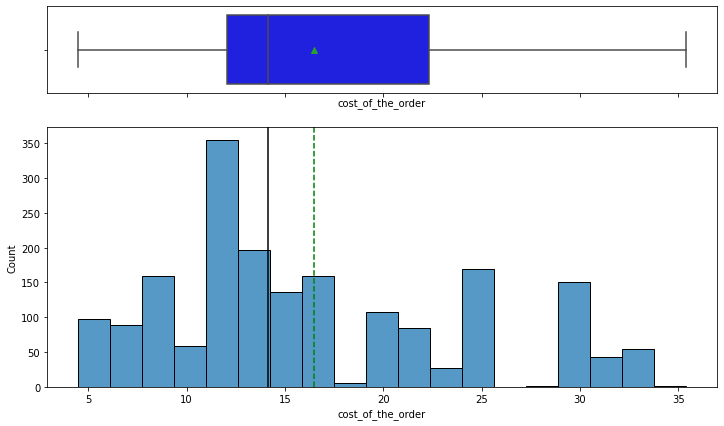

In [27]:
histogram_boxplot(df, 'cost_of_the_order') #this code outputs a boxplot and histogram

There is a slight right skewness 
Mean cost of the order is around $16
There are no outliers


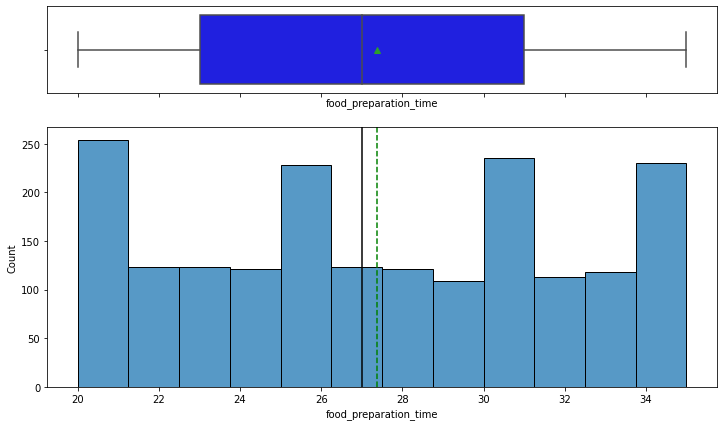

In [28]:
histogram_boxplot(df, 'food_preparation_time') #this code outputs a boxplot and histogram

The mean is slightly larger than the mean meaning a slight right skew 
Mean food prep time is around 27 minutes
There are no outliers

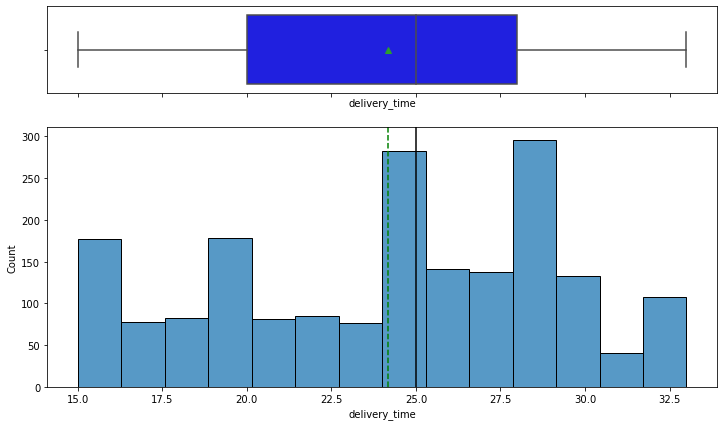

In [29]:
histogram_boxplot(df, 'delivery_time') #this code outputs a boxplot and histogram

There is a very slight left skewness
Mean delivery time is around 24 minutes
There are no outliers

C:\Users\gtrev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


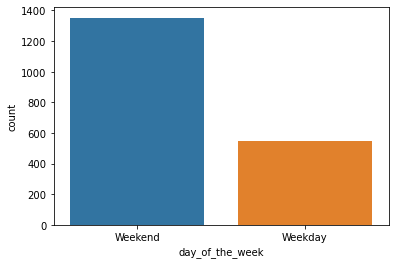

In [24]:
sns.countplot(df['day_of_the_week']); #this code displays the counts of the orders made on the weekend and weekday

Around 66% of orders are on the weekend

In [23]:
df['customer_id'].value_counts() #this code outputs the counts of the customer ids allowing us to see which customers order the most

52832     13
47440     10
83287      9
250494     8
65009      7
          ..
66393      1
142170     1
332635     1
147519     1
385023     1
Name: customer_id, Length: 1200, dtype: int64

Here we can see that the customer with the id # 52832 has ordered 13 times on foodhub

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [22]:
df['restaurant_name'].value_counts().sort_values(ascending = False).reset_index().head() #this line outputs the amount of times a restaraunt shows up in the dataset

,index,restaurant_name
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:


The top 5 most popular restaruants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [21]:
df2=df[df['day_of_the_week']=="Weekend"] #this code isolates the day of the week feature by weekend this allows us to analyse only the observations that take place on a weekend day
df2['cuisine_type'].value_counts().sort_values(ascending = False).reset_index().head(18) #with that we can now look at the most popular type of cuisine on the weekend with this line of code

,index,cuisine_type
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53
5,Indian,49
6,Mediterranean,32
7,Middle Eastern,32
8,Thai,15
9,French,13


#### Observations:


American, Japanese, Italian, Chinese food dominate the orders on the weekend which means restuarants that serve these types of food would also be very popular on the weekend

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [20]:
df3=(df['cost_of_the_order']>20).sum() #this line of code finds the amount orders that are over 20 dollars
df3 #this code outputs the amount of orders over 20
df3/1898*100 #this code divides that amount by the total amount of orders to give us the percentage of orders that are over 20 dollars

29.24130663856691

#### Observations:


29.24% of orders cost above 20 dollars
This percentage is on the low end and if foodhub makes more money off of bigger orders it would be helpful to ge this percentage higher.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [19]:
df['delivery_time'].mean() # this code outputs the mean delivery time based on this dataset

24.161749209694417

#### Observations:


The mean for delivery time seems pretty normal. I dont believe there are any intersting insights from the delivery time alone. It would be more insightful to look at and compare the delivery times of different restaurants and the difference between and weekend and weekday.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [18]:
grouped_data1 = df.groupby('cost_of_the_order') #this line groups the data by the cost of the order
print(grouped_data1)

grouped_data1.max() #this line prints out the 5 least expensive orders and 5 most expensive orders

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
cost_of_the_order,,,,,,,,,
4.47,1477349,52327,Nobu Next Door,Japanese,Weekend,5,28,26,54
4.66,1476877,53289,The Loop,Japanese,Weekend,Not given,34,25,59
4.71,1477788,270444,P.J. Clarke's,American,Weekend,Not given,23,15,38
4.75,1477790,145389,Shake Shack,Chinese,Weekend,4,35,28,63
4.80,1477787,14869,Shake Shack,American,Weekend,4,22,24,46
...,...,...,...,...,...,...,...,...,...
33.22,1478143,337525,TAO,Japanese,Weekend,Not given,23,19,42
33.32,1478329,116992,Tres Carnes,Mexican,Weekday,4,21,33,54
33.37,1477700,275689,Nobu Next Door,Japanese,Weekend,4,32,27,57


#### Observations:


The highest order in the dataset was $35.41 and belonged to customer id 1477814.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

In [ ]:
df.corr() #this code allows us to see the correlation values of all the variables

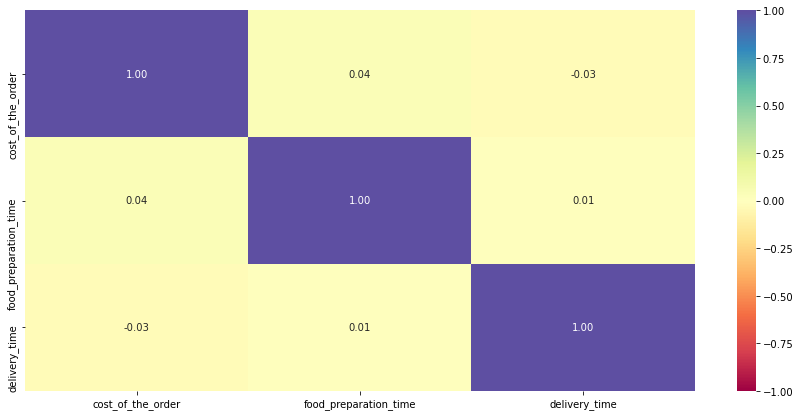

In [16]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order','food_preparation_time','delivery_time']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

There does not seem to be any strong correlations among the quantative variables
We will have to dive deeper to find any potential insights

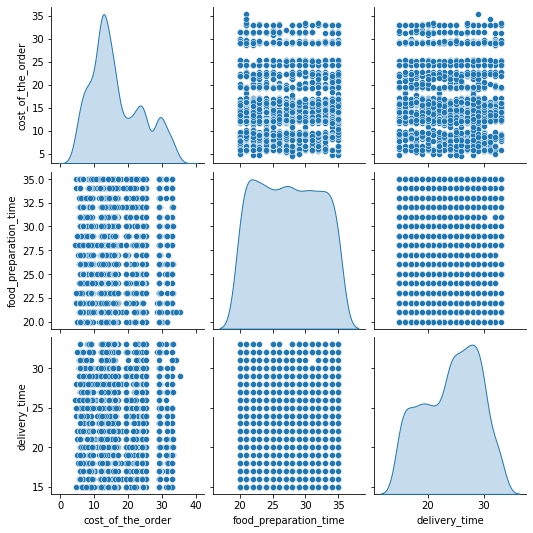

In [17]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

Again we see that there is no strong correlation between any of the variables 

<AxesSubplot:xlabel='rating', ylabel='total_time'>

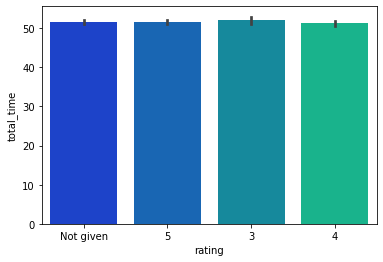

In [14]:
sns.barplot(x='rating', y='total_time', data=df, palette='winter') #barplot to compare average total time of each rating

It seems that the total time it takes the food to be delivered does not have an impact on the rating 
You would think that those rated higher would have a lower average total delivery time, however that is not the case menaing that there is more to a good rating than just how fast you receive the food

<AxesSubplot:xlabel='rating', ylabel='delivery_time'>

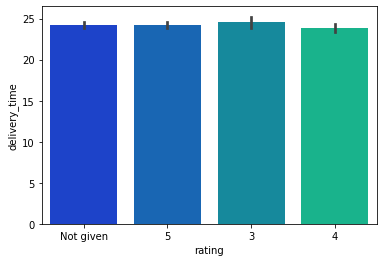

In [13]:
sns.barplot(x='rating', y='delivery_time', data=df, palette='winter')  #barplot to compare average delivery time of each rating

<AxesSubplot:xlabel='rating', ylabel='food_preparation_time'>

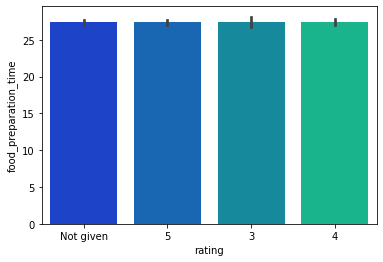

In [12]:
sns.barplot(x='rating', y='food_preparation_time', data=df, palette='winter')  #barplot to compare average food preperation time of each rating

That observation stays the same when you break it down by delivery time and food preperation time. The time it takes has no impact on the rating. The mean time for all the ratings are very simmilar

<AxesSubplot:xlabel='day_of_the_week', ylabel='cost_of_the_order'>

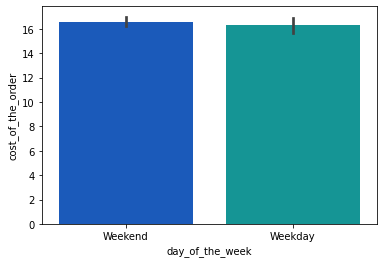

In [11]:
sns.barplot(x='day_of_the_week', y='cost_of_the_order', data=df, palette='winter') #plot to compare the average cost of the order on the weekend and the weekday

There is a slight increase in the average cost of the order on weekend compared to the weekday

<AxesSubplot:xlabel='rating', ylabel='total_time'>

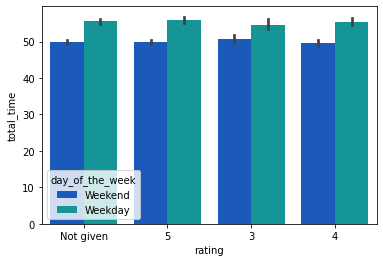

In [10]:
sns.barplot(x='rating', y='total_time', hue='day_of_the_week', data=df, palette='winter') 

Here we can see that the total time to deliver food is longer on the weekdays but it still has not impact on the rating that delivery receives

# What restaurants make the most money per order minimum 20 orders

In [9]:
food_count = df.groupby(['restaurant_name'])['cost_of_the_order'].count().reset_index()
food_count.head() #these lines group the data by restaurant name and cost of the order, then gives us the counts

food_top = food_count[food_count['cost_of_the_order']>20]['restaurant_name']
food_top.head() #here we pull only the restaurantns that have more than 20 orders

avg_cost = df.groupby(['restaurant_name'])['cost_of_the_order'].mean().sort_values(ascending=False).reset_index()
avg_cost #get the average cost of order 

avg_cost[avg_cost['restaurant_name'].isin(food_top)].head(15) #print the top 15 restaurants

,restaurant_name,cost_of_the_order
26,Chipotle Mexican Grill $1.99 Delivery,21.377826
56,Rubirosa,17.850000
63,Five Guys Burgers and Fries,17.464483
65,Sushi of Gari 46,17.320811
66,Blue Ribbon Fried Chicken,17.315521
68,TAO,17.030612
70,RedFarm Hudson,16.749273
71,Blue Ribbon Sushi Izakaya,16.727241
73,Jack's Wife Freda,16.670000
78,Han Dynasty,16.419348


This helps us get a better picture on the demand of the restaurants and see which restaurants are making the most per order.

# What cuisine type makes the most money per order

In [8]:
cuis_count = df.groupby(['cuisine_type'])['cost_of_the_order'].count().reset_index() # Finding the count of cost of orders for each cuisine type using groupby() and count()
cuis_count.head()

cuis_top = cuis_count[cuis_count['cost_of_the_order']>1]['cuisine_type']
cuis_top.head() #extracting the cuisine types that have more than one order

avg_cost1 = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending=False).reset_index()
avg_cost1 #finding average cost of the order per cuisine type

avg_cost1[avg_cost1['cuisine_type'].isin(cuis_top)].head(1889) #Extracting cuisine types that have more than 1 order using cuisine type in cuis_top and isin() function


,cuisine_type,cost_of_the_order
0,French,19.793889
1,Southern,19.300588
2,Thai,19.207895
3,Spanish,18.994167
4,Middle Eastern,18.820612
5,Mexican,16.933117
6,Indian,16.919726
7,Italian,16.418691
8,American,16.319829
9,Chinese,16.305209


Here we can see that some cuisine types like vietnamese food and Korean food do not perform as well as other types. It is interesting to see some of the more in demand cuisine typs not have a higher cost of the order but this could be due to the cost of the food at the restaurant

# What restaurant makes the most money on all orders

In [7]:
food_count = df.groupby(['restaurant_name'])['cost_of_the_order'].count().reset_index()
food_count.head()
food_top = food_count[food_count['cost_of_the_order']>20]['restaurant_name']
food_top.head()

avg_cost = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).reset_index()
avg_cost

avg_cost[avg_cost['restaurant_name'].isin(food_top)].head(11)

,restaurant_name,cost_of_the_order
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
5,RedFarm Broadway,965.13
6,RedFarm Hudson,921.21
7,TAO,834.50
8,Han Dynasty,755.29
9,Blue Ribbon Sushi Bar & Grill,666.62


This gives us even more insight on the demand of the restaurants by showing us the top 10 restaurant in terms of toal money earned. This is only for restaurants that have more than 20 orders

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [6]:
sf=df.copy() #this line makes a copy of the dataframe
sf.drop(sf[sf['rating'] == "Not given"].index, inplace = True) #here we replace "not given" with NaN
sf.dropna(subset = ['rating'], inplace=True) #here we drop the rows with NaN
sf['rating'] = sf.rating.astype('int') #this line turns the rating variable from object type to int type
rest_count=sf.groupby(['restaurant_name'])['rating'].count().reset_index()
rest_count.head() # Finding the count of ratings for each restaurant using groupby() and count()
rest_50 = rest_count[rest_count['rating']>50]['restaurant_name'] #extracting the restaurnats with more than 50 ratings
rest_50.head()
avg_rat = sf.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rat #finding average rating of the restaurants
avg_rat[avg_rat['restaurant_name'].isin(rest_50)].head(25)  #Extracting restuaurants that have more than 50 ratings using restaurant name in rest_50 and isin() function

,restaurant_name,rating
66,The Meatball Shop,4.511905
89,Blue Ribbon Fried Chicken,4.328125
93,Shake Shack,4.278195
101,Blue Ribbon Sushi,4.219178


#### Observations:


These 4 restaurants have more than 50 ratings and an average rating higher than 4 so they will recieve the promotion

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [3]:
df5=df[df['cost_of_the_order']>=20]
df14=df5['cost_of_the_order'].sum()
df13=df14*.25 #these lines of code find us the revenue on all orders greater than 20

df7=df[df['cost_of_the_order']<20]
df8=df7['cost_of_the_order'].sum() #these lines find the dollar amount of all oders less than 20

df9=df[df['cost_of_the_order']<5]
df10=df9['cost_of_the_order'].sum() #these lines find the dollar amount of all oders less than 5

df11=df8-df10 #this line finds the dollar amount of all orders greater than 5 but less than 20

df12=df11*.15

df13+df12 #this line finds the net revenue for foodhub

6166.303

#### Observations:


From this dataset Foodhub made a net revenue of $6166.30

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [4]:
sum_column = df["food_preparation_time"] + df["delivery_time"] #adds food prep time and delivery time to make total time
df["total_time"] = sum_column
df.head()
df6=len(df[(df['total_time'] > 60)]) #this line gives us the total rows that are over 60 minutes total time required to deliver food
df6/1898*100

10.537407797681771

#### Observations:


Around 10% of orders take a total time more than 60 minutes to get to the customers. This percentage is not that high, but it may be worthwhile to take a look into why these specific orders take longer than others. It could be the quantity of food ordered or maybe the proxmity between the restaurant and the customer is high, but this number does not seem to concerning.

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [5]:
df.groupby('day_of_the_week')[['delivery_time']].mean() #this code groups the data by day of the week and allows us to compare the weekday vs the weekend mean delivery time

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:


The mean delivery time is less on the weekend. This is really surprising becasue not only is the delivery time on average faster on the weekend, but there are also more orders placed on the weekend as well. It is possible that other factors outside of this dataset have an impact on delivery time, like weekday vs. weekend traffic or what time these orders are being made.

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

### Conclusion and Recommendations

Conclusions:

    After all the analysis we can conclude that:

    Most orders placed were on the weekend
    
    Only 29.5% of orders cost more than 20 dollars
    
    The top 5 restaurants and top 5 cuisine types directly align with the top being American, Japanese, and Italian restaurants.
    
    There are no strong correlations between any variables 
    
    Total time of delivery has no impact on the rating received 
    
    10.53% of orders take longer than 60 minutes to be delivered 
    
    The 5 restaurants with the most orders are also the restaurants that bring in the most money 


Recommendations: 
    
    Based on our analysis the following recommendations can help FoodHub better serve their customers:

    We should investigate offering promotions during the week in order to increase the number of orders placed on a weekday

    We should focus on promoting the restaurants and cuisine types that on average have higher ratings since these good experiences can bring potential repeat customers

    On top of promoting well performing restaurants and cuisine types, we should also focus on creating buzz for the restaurants and cuisine tops that do not bring in as much orders but still have high mean cost order. This may bring up our percentage of orders over $20

    Since demand is so high on the weekends it important to ensure delivery driver availability in order to keep delivery time low 

    The mean delivery time is higher on the weekdays, more data should be looked at to investigate why but it is probably due to a low number of drivers available 

    More data should be  taken to get a better understanding of restaurant demand, it would be helpful to get some more information such as what time the food was ordered and the location of the restaurants and orders.


    